In [402]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier # 분류
from sklearn.neighbors import KNeighborsRegressor  # 회귀-예측
# 자동으로 데이터 셔플 후 나눠주는 모듈
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import requests
import glob, os.path, re

# maplotlib.rcParams['font.family'] = 'AppleGothic Gothic   # Mac 사용자
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = '10'  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False

In [403]:
## 회귀분석
# KNeighborsClassifier() : 최근접 이웃 분류 -> scatter 그래프 내에서 거리상 최근접 이웃의 개수에 따라 판별
# KNeighborsRegressor() : 그래프 내에서 거리상 최근접 이웃의 거리의 평균을 구하여 예측치를 결정한다.

In [404]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0])

perch_length

array([ 8.4, 13.7, 15. , 16.2, 17.4, 18. , 18.7, 19. , 19.6, 20. , 21. ,
       21. , 21. , 21.3, 22. , 22. , 22. , 22. , 22. , 22.5, 22.5, 22.7,
       23. , 23.5, 24. , 24. , 24.6, 25. , 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28. , 28.7, 30. , 32.8, 34.5, 35. , 36.5, 36. , 37. , 37. ,
       39. , 39. , 39. , 40. , 40. , 40. , 40. , 42. , 43. , 43. , 43.5,
       44. ])

Text(0, 0.5, 'weight')

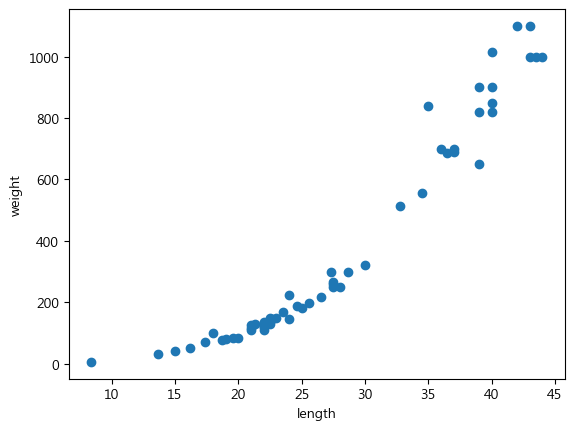

In [405]:
# 데이터 산점도 그래프 출력
# x축은 길이 df[0], y축은 무게 df[1] 
plt.scatter(perch_length, perch_weight)   # 그래프를 그려봄으로써 0 값이 있는지 확인
plt.xlabel('length')
plt.ylabel('weight')

### 머신러닝 구현
1. 데이터 전처리 - Nan, 0, 단위처리, 훈련세트, 테스트세트 분리
2. 데이터 학습
3. 데이터 예측
4. 예측값 구하기

In [406]:
# 1. 데이터 전처리
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight)

# train_input

In [407]:
# 총 개수 :  56

train_input.shape   # 42
test_input.shape    # 14

(14,)

In [408]:
# [1,2,3,4]
# [[1, 2],[3, 4]]  (2,2)차원

arr1 = np.array([1,2,3,4,5,6])
arr1 = arr1.reshape(2,3)
arr1

array([[1, 2, 3],
       [4, 5, 6]])

In [409]:
# [1,2,3,4]  # 1차원
#[[1],[2],[3],[4]]  # 2차원

arr1 = np.array([1,2,3,4,5,6])
arr1 = arr1.reshape(-1,1)
arr1

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [410]:
# 알고리즘 구현을 위한 2차원 행렬로 변경.
# 2가지 이상의 특성이 존재하면 이 과정은 필요하지 않지만, 
# 1가지 특성만을 가질 땐 reshape 과정이 필요하다
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [411]:
train_input.shape   # 원래 (42, ) 형태였으나, reshape 후 2차원 구조로 바뀜 (42,1)
test_input.shape    # (14, 1)로 바뀜

(14, 1)

In [412]:
# 2. 데이터 학습
knr = KNeighborsRegressor()
knr.fit(train_input,train_target)

KNeighborsRegressor()

In [413]:
# 데이터 예측하기
# 3-1. 예측의 오차범위 - 평균 절댓값 오차
from sklearn.metrics import mean_absolute_error
predict = knr.predict(test_input)
# 무게 예측
print("예측값 : ", predict)


예측값 :  [128.  128.   70.9 967.  967.  847.  163.  255.6 102.6 847.   99.6 967.
 666.2 272. ]


test_input 예측률 > train_input 예측률 일시 
- 과소적합 : 데이터에 문제가 있는 것 -> n_neighbor 기본이 5인데 3으로 변경(값을 줄임)


test_input 예측률 << train_input 예측률
- 과대적합 : n_neighbor 값을 높임

In [414]:
# 4. 예측 정답률 계산
# test_input ( 현재 과소적합 )
score = knr.score(test_input, test_target)
print("test 예측률 : ", round(score*100,1),'%')
score

test 예측률 :  97.5 %


0.9746727121889062

In [415]:
# 실제 train 데이터의 예측률은 어느 정도 나오는지 확인
score2 = knr.score(train_input, train_target)
print("train 예측률 : ", round(score*100,1),'%')
score2

train 예측률 :  97.5 %


0.9735137035582414

그래프 구성

In [416]:
# 이웃의 개수를 축소 : 5에서 3으로 변경
# 과소적합 부분의 문제를 해결
knr.n_neighbors = 3
# 데이터 훈련 다시 시키기
knr.fit(train_input, train_target)
# train,test 데이터 예측
score1 = knr.score(train_input, train_target)
print("train 예측률  : ", score1)

score2 = knr.score(test_input, test_target)
print("test 예측률  : ", score2)

train 예측률  :  0.9782291109015586
test 예측률  :  0.9761775431148498


In [417]:
# 예측한 값과 실제값의 평균 절대값 오차를 구해줘
test_mean = mean_absolute_error(test_target, predict)
print("오차 범위 : ", test_mean)

오차 범위 :  40.73571428571428


knn 회귀 분석을 통해 농어에 대한 무게를 예측하는 프로그램을 구현

In [418]:
perch_length

array([ 8.4, 13.7, 15. , 16.2, 17.4, 18. , 18.7, 19. , 19.6, 20. , 21. ,
       21. , 21. , 21.3, 22. , 22. , 22. , 22. , 22. , 22.5, 22.5, 22.7,
       23. , 23.5, 24. , 24. , 24.6, 25. , 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28. , 28.7, 30. , 32.8, 34.5, 35. , 36.5, 36. , 37. , 37. ,
       39. , 39. , 39. , 40. , 40. , 40. , 40. , 42. , 43. , 43. , 43.5,
       44. ])

In [419]:
arr = [[i] for i in range(5,45+1)] # x축의 좌표 ( 배열 안 배열 상태 )
arr

[[5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28],
 [29],
 [30],
 [31],
 [32],
 [33],
 [34],
 [35],
 [36],
 [37],
 [38],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45]]

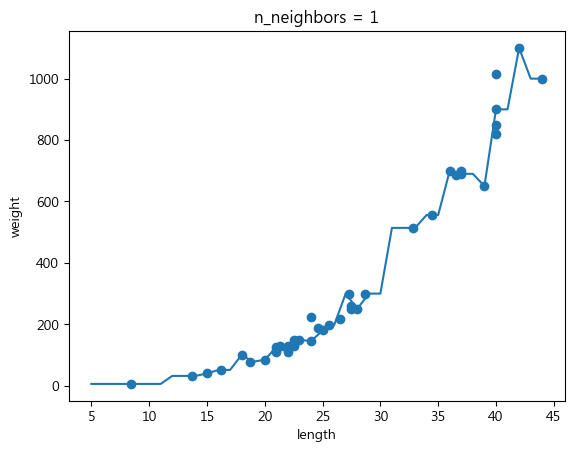

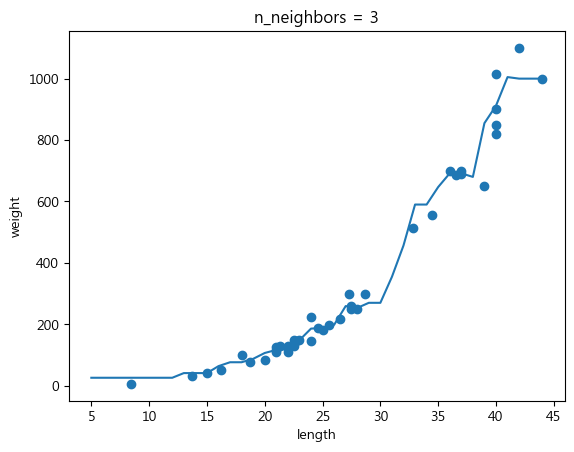

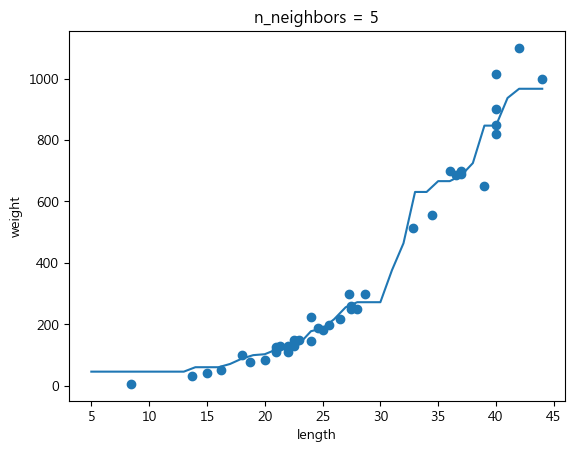

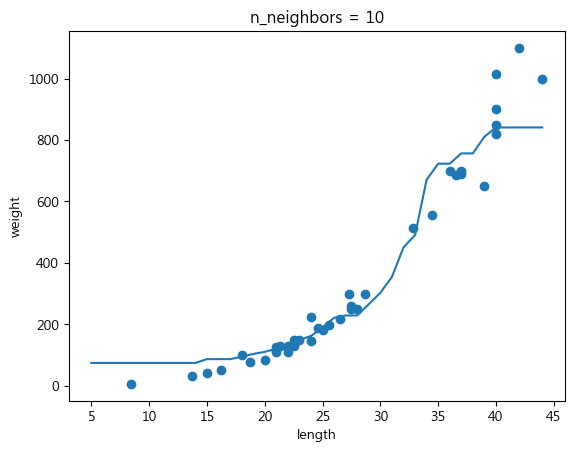

In [420]:
knr= KNeighborsRegressor()
x = np.arange(5,45).reshape(-1,1)
for n in [1,3,5,10]: # n_neighbors = 1,5,10 예측률을 그래프로 표시
    knr.n_neighbors = n
    # 데이터 훈련 다시 시키기
    knr.fit(train_input, train_target)
    
    # 배열로 만든 길이를 가지고 예측무게 산출
    predict = knr.predict(x)
    
    # 훈련세트의 값을 먼저 출력
    plt.scatter(train_input,train_target)
    plt.plot(x, predict)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()
    